In [1]:
import pandas as pd
import numpy as np

In [2]:
import wrds
db = wrds.Connection(wrds_username='zdyang94')

Loading library list...
Done


In [3]:
stocks=['EIX','XOM','KO','BAC','PFE','GE','INTC','MCD','DIS']

In [4]:
EIX=db.raw_sql("""select datadate,prccq,datacqtr,rdq,atq,ltq,epsfiq from comp.fundq where 
            tic='EIX' 
            and datadate between 
            '1989-12-31'and '2019-12-31'
            LIMIT 1000;""")

In [5]:
XOM=db.raw_sql("""select datadate,prccq,datacqtr,rdq,atq,ltq,epsfiq from comp.fundq where 
            tic='XOM' 
            and datadate between 
            '1989-12-31'and '2019-12-31'
            LIMIT 1000;""")

In [6]:
KO=db.raw_sql("""select datadate,prccq,datacqtr,rdq,atq,ltq,epsfiq from comp.fundq where 
            tic='KO' 
            and datadate between 
            '1989-12-31'and '2019-12-31'
            LIMIT 1000;""")

In [7]:
BAC=db.raw_sql("""select datadate,prccq,datacqtr,rdq,atq,ltq,epsfiq from comp.fundq where 
            tic='BAC' 
            and datadate between 
            '1989-12-31'and '2019-12-31'
            LIMIT 1000;""")

In [8]:
PFE=db.raw_sql("""select datadate,prccq,datacqtr,rdq,atq,ltq,epsfiq from comp.fundq where 
            tic='PFE' 
            and datadate between 
            '1989-12-31'and '2019-12-31'
            LIMIT 1000;""")

In [9]:
GE=db.raw_sql("""select datadate,prccq,datacqtr,rdq,atq,ltq,epsfiq from comp.fundq where 
            tic='GE' 
            and datadate between 
            '1989-12-31'and '2019-12-31'
            LIMIT 1000;""")

In [10]:
INTC=db.raw_sql("""select datadate,prccq,datacqtr,rdq,atq,ltq,epsfiq from comp.fundq where 
            tic='INTC' 
            and datadate between 
            '1989-12-31'and '2019-12-31'
            LIMIT 1000;""")

In [11]:
MCD=db.raw_sql("""select datadate,prccq,datacqtr,rdq,atq,ltq,epsfiq from comp.fundq where 
            tic='MCD' 
            and datadate between 
            '1989-12-31'and '2019-12-31'
            LIMIT 1000;""")

In [12]:
DIS=db.raw_sql("""select datadate,prccq,datacqtr,rdq,atq,ltq,epsfiq from comp.fundq where 
            tic='DIS' 
            and datadate between 
            '1989-12-31'and '2019-12-31'
            LIMIT 1000;""")
DIS.head()

,datadate,prccq,datacqtr,rdq,atq,ltq,epsfiq
0,1989-12-31,112.000,1989Q4,1990-01-23,6883.098,3676.998,1.26
1,1990-03-31,111.125,1990Q1,1990-04-25,6892.898,3605.998,1.29
2,1990-06-30,128.250,1990Q2,1990-07-26,8013.598,4668.998,1.75
3,1990-09-30,90.625,1990Q3,1990-11-08,8022.297,4533.697,1.72
4,1990-12-31,101.500,1990Q4,1991-01-24,8567.797,5058.897,1.28


In [13]:
LIST=[EIX,XOM,KO,BAC,PFE,GE,INTC,MCD,DIS]
len(LIST[1])

121

In [14]:
for i in LIST:
    ret_list=['NAN']
    for j in range(len(i)-1):
        ### CALCULATE THE 3 MONTH RETURN AFTER THE QUARTERLY FINANCIAL STATEMENT RELEASE ###
        ret=(i.iloc[j+1,1]-i.iloc[j,1])/i.iloc[j,1]
        ret_list.append(ret)
    ### CALCULATE the asset/debt ratio ###      
    i['3MRet']=ret_list
    
    ### CALCULATE ASSET/LIABILITY RATIO ###
    i['A2D']=i['atq']/i['ltq']
    
    ### CALCULATE EPS/PRICE RATIO ###
    i['EPS2P']=i['epsfiq']/i['prccq']
    
    ### DISCARD THE FIRST ROW ###
    i.drop([0],inplace=True)
    i.fillna(method='ffill')

In [15]:
LIST[0].head()

,datadate,prccq,datacqtr,rdq,atq,ltq,epsfiq,3MRet,A2D,EPS2P
1,1990-03-31,37.250,1990Q1,1990-04-23,16551.098,10648.023,0.79,-0.0539683,1.554382,0.021208
2,1990-06-30,37.500,1990Q2,1990-07-19,16739.398,10842.664,0.67,0.00671141,1.543845,0.017867
3,1990-09-30,36.000,1990Q3,1990-10-22,17337.598,11302.092,1.31,-0.04,1.534017,0.036389
4,1990-12-31,37.875,1990Q4,1991-01-17,17476.898,11404.948,0.83,0.0520833,1.532396,0.021914
5,1991-03-31,39.750,1991Q1,1991-04-19,17318.000,11218.464,0.79,0.049505,1.543705,0.019874


In [16]:
### start to create the factor tables ###
A2D=pd.DataFrame([])
for i in range(len(LIST)):
    A2D[stocks[i]]=LIST[i]['A2D']
    
EPS2P=pd.DataFrame([])
for i in range(len(LIST)):
    EPS2P[stocks[i]]=LIST[i]['EPS2P']

In [17]:
EPS2P.head()

,EIX,XOM,KO,BAC,PFE,GE,INTC,MCD,DIS
1,0.021208,0.021897,0.011104,0.033032,0.024742,0.016498,0.017485,0.013228,0.011609
2,0.017867,0.018172,0.013746,0.033600,0.014035,0.017617,0.017660,0.016338,0.013645
3,0.036389,0.017347,0.014684,0.023860,0.020531,0.021284,0.024962,0.025000,0.018979
4,0.021914,0.023768,0.009462,0.011366,0.011393,0.024749,0.020519,0.016824,0.012611
5,0.019874,0.030427,0.008848,0.019928,0.014579,-0.013214,0.020321,0.012950,0.007983


In [23]:
#define a test back period, usually = 12
period=12
for i in LIST:
    factor_coefficient=['NAN' for i in range(period)]
    for j in range(len(i)-period):
        o=np.array(i.iloc[j:j+period,8:10])
        a=o.T
        b=np.dot(a,o)
        c=np.linalg.pinv(b)
        d=np.dot(a,np.array(i.iloc[j:j+period,7]))
        e=np.dot(c,d)
        f=np.array(i.iloc[j+1,8:10])
        factor_coefficient.append(sum(e*f))
    i['COEF']=factor_coefficient
    i.fillna(method='ffill',inplace=True)

In [31]:
LIST[3].head()

,datadate,prccq,datacqtr,rdq,atq,ltq,epsfiq,3MRet,A2D,EPS2P,COEF
1,1990-03-31,38.750,1990Q1,1990-04-18,63683.398,60610.898,1.28,-0.162162,1.050692,0.033032,NAN
2,1990-06-30,37.500,1990Q2,1990-07-17,66187.500,63007.699,1.26,-0.032258,1.050467,0.033600,NAN
3,1990-09-30,21.375,1990Q3,1990-10-18,69224.250,66019.688,0.51,-0.430000,1.048539,0.023860,NAN
4,1990-12-31,22.875,1990Q4,1991-01-21,65284.500,62076.797,0.26,0.070175,1.051673,0.011366,NAN
5,1991-03-31,34.625,1991Q1,1991-04-18,115798.000,109539.000,0.69,0.513661,1.057139,0.019928,NAN


In [30]:
from sklearn import preprocessing
factor_values=pd.DataFrame([])
for i in range(len(LIST)):
    factor_values[stocks[i]]=LIST[i]['COEF']
factor_values.drop([1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
# Get column names first
names = factor_values.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(factor_values)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,EIX,XOM,KO,BAC,PFE,GE,INTC,MCD,DIS
0,-0.239942,0.001134,-3.690388,-0.591771,0.596610,0.318996,0.578335,-0.153000,-0.972731
1,-0.253604,0.230021,-4.266685,-0.370834,0.792816,-0.032618,-0.090796,-1.176325,-1.669890
2,-0.319424,0.476614,0.708150,-0.276772,0.715613,-0.361570,-0.057410,-0.317992,-1.071013
3,-0.310344,0.776982,1.317374,-0.212070,0.725441,2.666397,0.511837,0.219458,-0.507820
4,-0.349889,-0.067679,-1.529954,-0.271758,0.359498,0.576467,-0.022654,-0.169245,-0.656716


In [38]:
fv_ranked=scaled_df.rank()
fv_ranked.head()

,EIX,XOM,KO,BAC,PFE,GE,INTC,MCD,DIS
0,48.0,67.0,2.0,13.0,85.0,70.0,97.0,52.0,9.0
1,44.0,77.0,1.0,37.0,93.0,53.0,41.0,10.0,3.0
2,34.0,86.0,87.0,61.0,89.0,39.0,44.0,35.0,6.0
3,37.0,91.0,104.0,67.0,90.0,107.0,95.0,79.0,30.0
4,29.0,60.0,7.0,64.0,76.0,83.0,48.0,51.0,20.0


In [51]:
quater_ret=pd.DataFrame([])
for i in range(len(LIST)):
    quater_ret[stocks[i]]=LIST[i]['3MRet']
names2 = quater_ret.columns
# Create the Scaler object
scaler2 = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df2 = scaler.fit_transform(quater_ret)
scaled_df2 = pd.DataFrame(scaled_df2, columns=names)
ret_ranked=scaled_df2.rank().iloc[12:,:]
ret_ranked.head()

,EIX,XOM,KO,BAC,PFE,GE,INTC,MCD,DIS
12,75.0,88.0,60.0,73.0,15.0,64.0,111.0,82.0,62.0
13,6.0,51.0,53.0,31.0,85.0,79.0,4.0,29.0,20.0
14,39.0,47.0,35.0,61.0,18.0,48.0,108.0,74.0,21.0
15,18.0,32.0,77.0,39.0,103.0,91.0,25.0,87.0,93.0
16,16.0,49.0,16.0,37.0,6.0,36.0,70.0,49.0,37.0


In [53]:
len(ret_ranked)

108

In [54]:
def manual_pearson(a,b):

    a_avg = np.average(a)
    b_avg = np.average(b)
    a_stdev=np.std(a)
    b_stdev=np.std(b)
    n = len(a)
    denominator = a_stdev * b_stdev * n
    numerator = np.sum(np.multiply(a-a_avg, b-b_avg))
    p_coef = numerator/denominator
    return p_coef  

In [60]:
result_final=[]
for i in range(len(ret_ranked)):
    result_final.append(manual_pearson(fv_ranked.iloc[i,:],ret_ranked.iloc[i,:]))
Final=pd.DataFrame(result_final)
Final.describe()

,0
count,108.000000
mean,-0.033192
std,0.362129
min,-0.911896
25%,-0.323839
50%,-0.044996
75%,0.210066
max,0.686398


In [65]:
import matplotlib.pyplot as plt

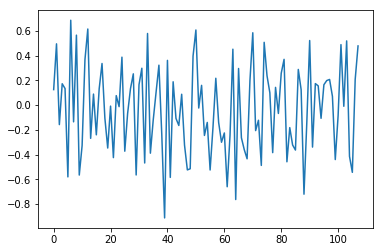

In [66]:
plt.plot(Final)

Conclusion: This model is not effective enough to create a useful and profitable portfolio
It does not have a positive mean IC, which means that the stock price is not highly related to the 2 finance factor selected.